In [1]:
# importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [21]:
# loading the dataset
df = pd.read_csv('linearRegressiondf.csv', encoding='utf-8', index_col=0)

In [22]:
# checking the top 5 rows of the dataset
df.head()

,user,totalSwipes,Number of Messages,Negative messages,Positive messages,Y,Language_['en'],Language_['es'],Language_['ja']
0,01713d,132437,8061,3262,4799,0.595336,1,0,0
1,041eb6,18698,2113,453,1660,0.785613,1,0,0
2,47676,70327,3671,1729,1942,0.529011,1,0,0
3,04f221,10473,1793,836,957,0.533742,1,0,0
4,05313e,4883,396,87,309,0.780303,1,0,0


In [23]:
# filtering the dataframe
df = df[['totalSwipes','Number of Messages',"Language_['en']","Language_['es']","Language_['ja']", 'Y']]

In [24]:
# checking the basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   totalSwipes         118 non-null    int64  
 1   Number of Messages  118 non-null    int64  
 2   Language_['en']     118 non-null    int64  
 3   Language_['es']     118 non-null    int64  
 4   Language_['ja']     118 non-null    int64  
 5   Y                   118 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 6.5 KB


In [25]:
# checking the missing values
df.isna().sum()

totalSwipes           0
Number of Messages    0
Language_['en']       0
Language_['es']       0
Language_['ja']       0
Y                     0
dtype: int64

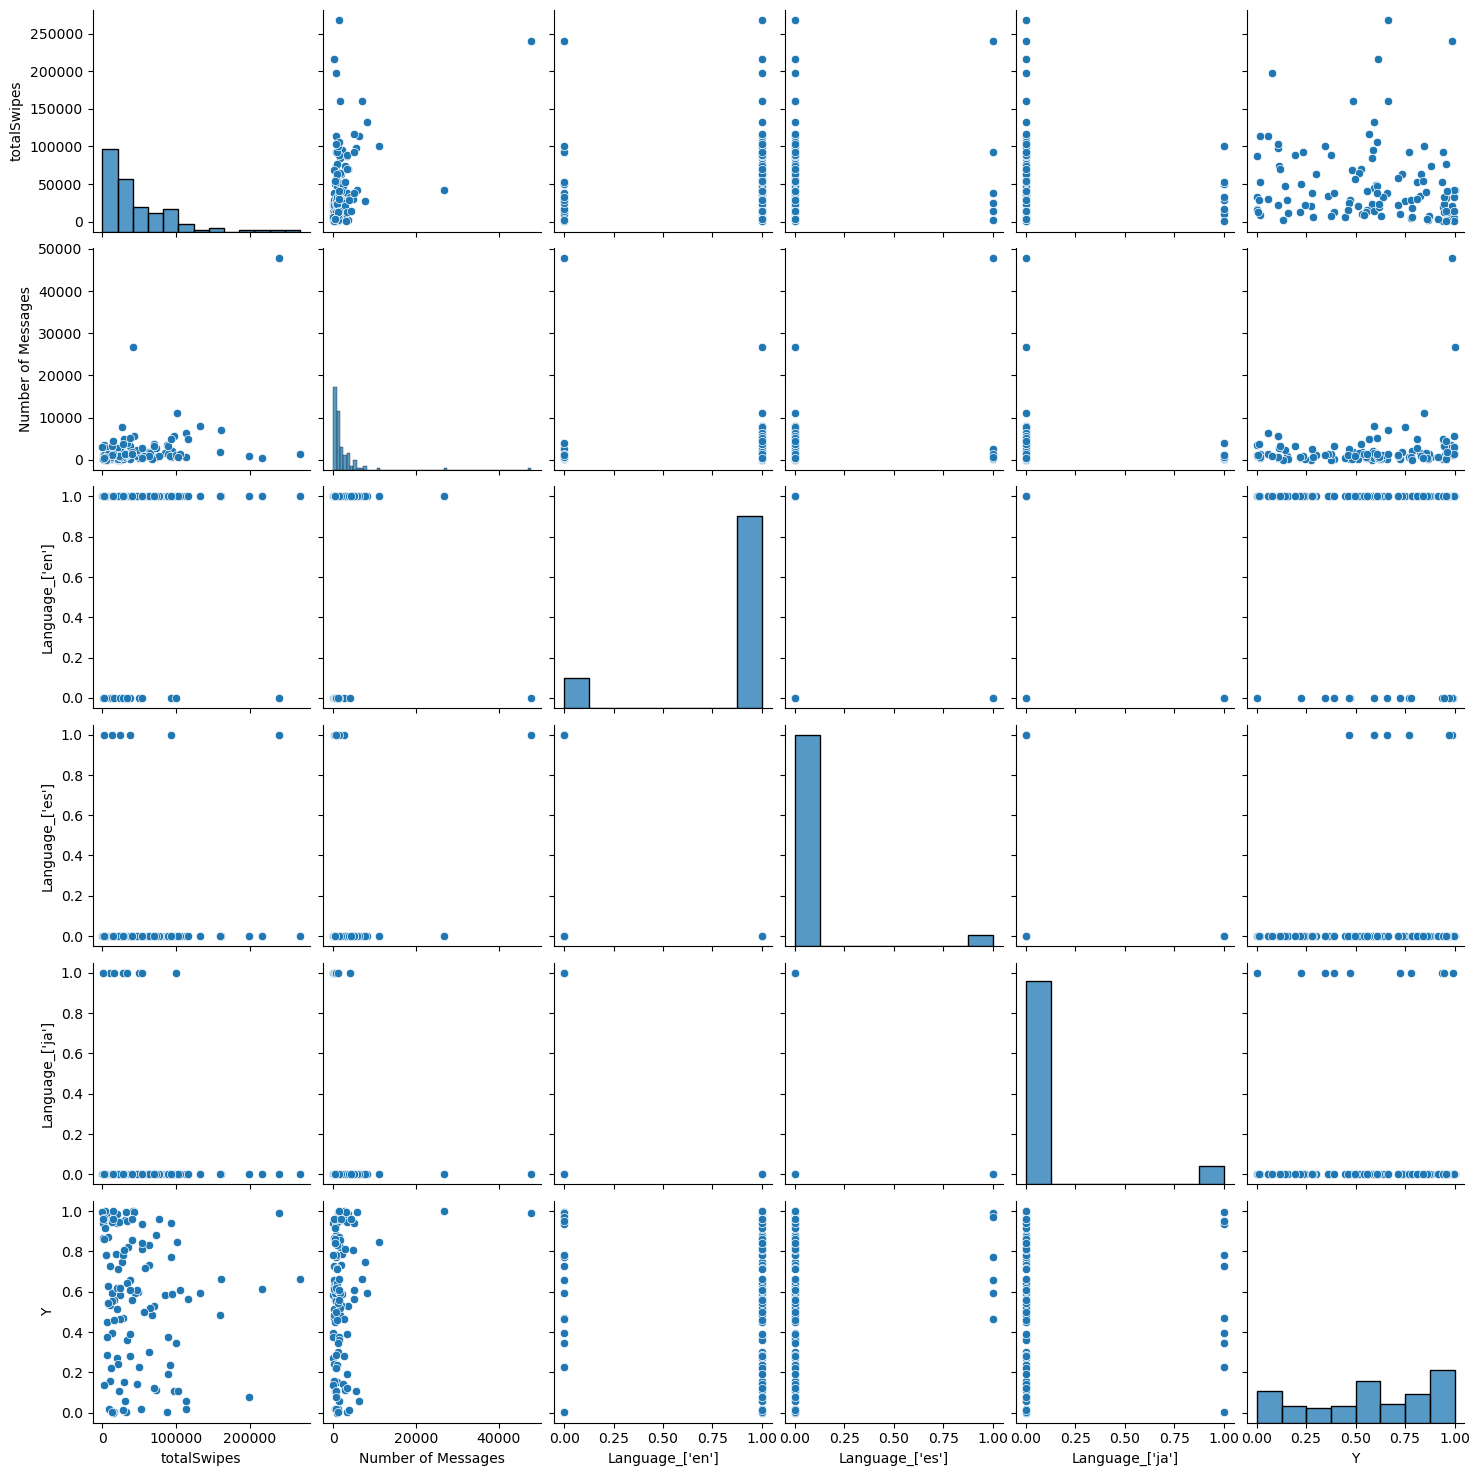

In [26]:
# pairplot to check the correlation and distribution
sns.pairplot(df)
plt.show()

We can see that our independent features are having very week relationship with the target variable. lets plot a heat map.

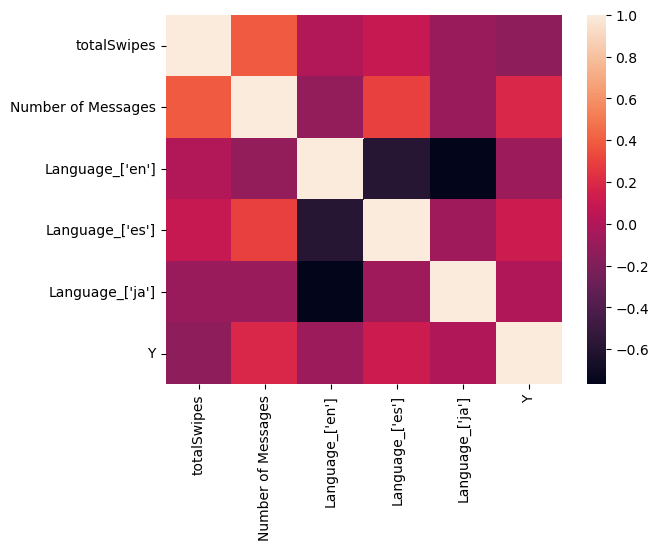

In [27]:
# heatmap to check the strength of correlation
sns.heatmap(df.corr())
plt.show()

we can see that number of messages and postive messages are the only features that shows us somewhat correlation but that is very weak.

In [28]:
# seperating the independent variables
X = df.drop('Y', axis=1)

In [29]:
# seperating the target variables
y = df['Y']

In [30]:
# normalizing our data by standard scaler

# define standard scaler
scaler = StandardScaler()

# transform data
scaled_X = scaler.fit_transform(X)

print(scaled_X)


[[ 1.71783162e+00  1.10615757e+00  3.96059017e-01 -2.31455025e-01
  -3.04290310e-01]
 [-5.76168600e-01 -4.96105009e-02  3.96059017e-01 -2.31455025e-01
  -3.04290310e-01]
 [ 4.65135943e-01  2.53127672e-01  3.96059017e-01 -2.31455025e-01
  -3.04290310e-01]
 [-7.42058504e-01 -1.11790357e-01  3.96059017e-01 -2.31455025e-01
  -3.04290310e-01]
 [-8.54803131e-01 -3.83244290e-01  3.96059017e-01 -2.31455025e-01
  -3.04290310e-01]
 [-1.85636537e-01 -4.27353125e-01 -2.52487623e+00  4.32049380e+00
  -3.04290310e-01]
 [-4.70785651e-01 -4.57860117e-01  3.96059017e-01 -2.31455025e-01
  -3.04290310e-01]
 [ 7.51938914e-01 -1.61922865e-01  3.96059017e-01 -2.31455025e-01
  -3.04290310e-01]
 [-3.81235357e-01 -4.05978799e-01 -2.52487623e+00 -2.31455025e-01
   3.28633535e+00]
 [-6.92341955e-01 -4.49310386e-01 -2.52487623e+00 -2.31455025e-01
   3.28633535e+00]
 [-7.53978374e-01 -4.42509465e-01 -2.52487623e+00 -2.31455025e-01
   3.28633535e+00]
 [ 9.55242285e-01 -5.48569263e-02  3.96059017e-01 -2.31455025e-01

In [31]:
# spliting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [32]:
# linear regression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [33]:
print(regr.score(X_test, y_test))

0.14432204156839612


In [34]:
y_pred = regr.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.28483278986849164
MSE: 0.10710864136774666
RMSE: 0.32727456572081287


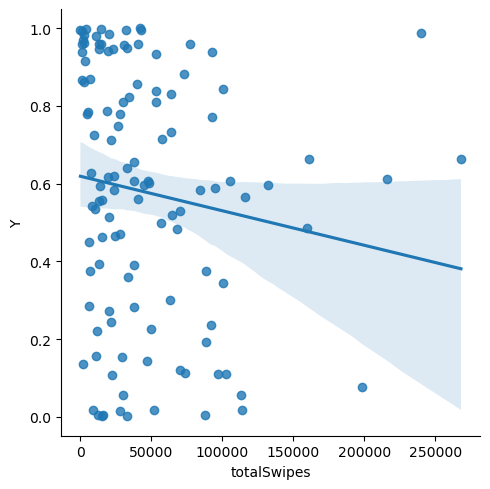

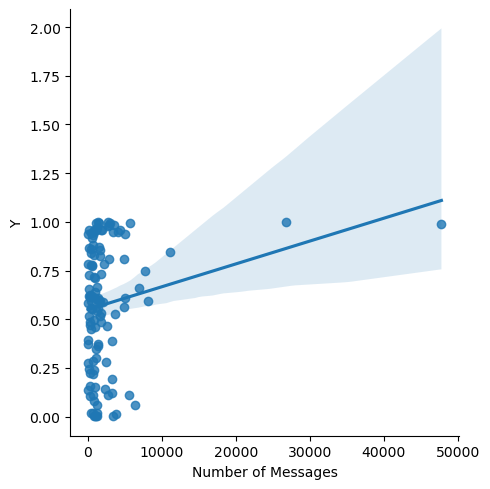

In [36]:
# regression plot for columns that are showining somewhat correlation
for col in ['totalSwipes','Number of Messages']:
    sns.lmplot(x=col, y='Y', data=df)
    plt.show()

In [ ]:
""